## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [1]:
import numpy as np

In [7]:
def wordDistance(string1,string2):
    arr = np.zeros((len(string1),len(string2)),dtype = int)
    for r, s1 in enumerate(string1):
        for c, s2 in enumerate(string2):
            if s1 == s2:                           
                arr[r][c] = 1
            elif s1 != s2:
                arr[r][c] = 0                
    tag = []
    for i in range(min(len(string1),len(string2))):
        tag.append(arr[i][i])
    solution = []
    for i,k in enumerate(tag):
        if k != 1:
            solution.append('POS {} SUB {} => {}'.format(i,string1[i], string2[i]))
    if len(string1) < len(string2):
        for s in string2[len(string1):]:
            solution.append('ADD {}'.format(s))
    if len(string1) > len(string2):
        for s in string1[len(string2):]:
            solution.append('DEL {}'.format(s))
    maxIndex = np.where(arr == np.max(arr))
    return solution

In [8]:
wordDistance("ABCDE","ABCCEF")

['POS 3 SUB D => C', 'ADD F']

In [9]:
wordDistance('ATCGGAA', 'ATCGGGA')

['POS 5 SUB A => G']

In [10]:
wordDistance('beijing', 'biejin')

['POS 1 SUB e => i', 'POS 2 SUB i => e', 'DEL g']

In [11]:
wordDistance('biejinabc','beijing')

['POS 1 SUB i => e', 'POS 2 SUB e => i', 'POS 6 SUB a => g', 'DEL b', 'DEL c']

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:为参数寻找正确的变化方向，梯度方向是变化最快的方向，效率高。

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:Gredient是梯度的意思，Descent是下降，Gredient Descent就是负梯度方向，在该方向上函数降低的速度最快，训练的效率最高


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:便于计算机实现，而且随着训练次数和训练数据量的增加，其精确度也越来越高。

4. Using the simple words to describe: What's the machine leanring.¶

Ans:通过对数据的学习，能够得到其数学模型。

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [12]:
import random
import matplotlib.pylab as plt
import numpy as np

In [2]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

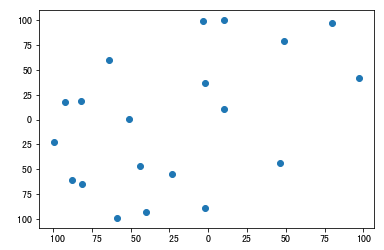

In [3]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [4]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

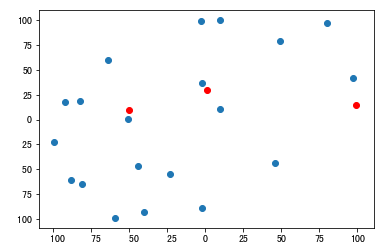

In [6]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro

#### 两点之间距离

In [13]:
def pointDis(p1,p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

#### 距离矩阵

In [14]:
def computeDistance(points):
    disDic = {}    
    disArr = np.zeros((len(points),len(points)),dtype = float)
    for p1 in range(len(points)):
        for p2 in range(len(points)):
            if p1 != p2:
                dis = pointDis(points[p1],points[p2])
                disArr[p1][p2] = dis
                disDic[(p1,p2)] = dis
    return disArr

#### 多点距离

In [15]:
def pathDistance(index,disArray,points):
    dis = 0    
    if len(index) < 2 : return 0
    for i in range(1,len(index)):
        p1 = points[index[i - 1]]
        p2 = points[index[i]]
        dis += pointDis(p1,p2)
    return dis

#### 深度搜索算法寻找最短路径

In [16]:
def findMinPath(points,start):
    disArr = computeDistance(points)    
    currPos = start    
    row, col = points.shape
    pathes = [[currPos]]
    for i in range(1,row):
        newPathes = []
        for path in pathes:            
            currPos = path[-1]
            nextSteps = disArr[currPos][:]
            visitedPoints = set(path)
            disSortArg = np.argsort(nextSteps)
            countPathNumber = 0
            for x in disSortArg:
                if x not in visitedPoints:
                    visitedPoints.add(x)
                    currPath = path[:]
                    currPath.append(x)
                    newPathes.append(currPath)
                    countPathNumber += 1                                
        newPathes = sorted(newPathes, key = lambda x: pathDistance(x,disArr,points), reverse = False)#排序
        #print('newPathes:',len(newPathes))
        if len(newPathes)>0:pathes = newPathes[:1000] #取得排序靠前的pathes，减少解题规模        
    return pathes[0]

#### 贪心算法计算最短路径

In [17]:
def findMinDis(disArr,start):
    sequence = []
    row,col = disArr.shape
    currPos = start
    nextPos = 0
    sequence.append(currPos)
    for i in range(1,row):
        nextSteps = disArr[currPos][:]
        disSortArg = np.argsort(nextSteps)
        for x in disSortArg:
            if x != currPos and x not in sequence:
                nextPos =x
                break
        if nextPos not in sequence:
            sequence.append(nextPos)
        currPos = nextPos      
    return sequence

#### 路径显示

In [18]:
def showPath(points,path,showText = False):
    plt.scatter(points[:,0],points[:,1])
    for i, p in enumerate(points):       
        if showText: 
            plt.text(p[0] + 10 ,p[1] ,str(i),fontsize=10)
    for i in range(1,len(points)):
        p1 = points[path[i-1]]
        p2 = points[path[i]]
        plt.plot((p1[0],p2[0]),(p1[1],p2[1]))
        if showText: 
            plt.text(p1[0],p1[1],str(i),fontsize=15)
        #print(p1,p2)
    if showText: 
        plt.text(p2[0],p2[1],str(len(points)),fontsize=15)

#### 生成点集

In [19]:
pointsNumber = 10
latitudes = [random.randint(-100, 100) for _ in range(pointsNumber)]
longitude = [random.randint(-100, 100) for _ in range(pointsNumber)]
points = np.array(list(zip(latitudes,longitude)))
disArr = computeDistance(points)

#### 结果

贪心算法： 479.7589394463313 [8, 0, 4, 6, 2, 9, 1, 3, 7, 5]
搜索算法： 430.080236812517 [8, 0, 9, 2, 4, 6, 3, 7, 1, 5]


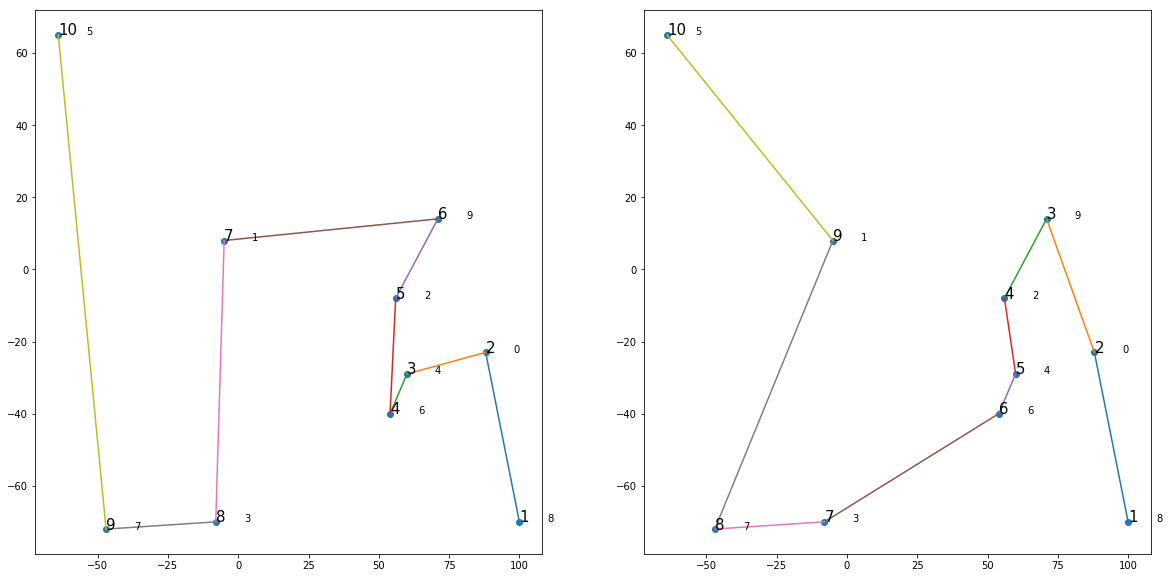

In [20]:
start = random.choice(range(len(points))) #起始点
path = findMinDis(disArr,start)
print('贪心算法：',pathDistance(path,disArr,points),path)
plt.figure(figsize=(20,10))
plt.subplot(121)
showPath(points,path,True)
path = findMinPath(points,start)
print('搜索算法：',pathDistance(path,disArr,points),path)
plt.subplot(122)
showPath(points,path,True)